# 1. Introduction

Name : Hilal Amirudin

Batch : RMT 019

Objektiv : predicting customer churn product

# 2. Import Library

In [1]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Load Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer

# Modelling
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, BatchNormalization

# Saving
import pickle

# 3. Data Loading

Dataset Description

| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |

In [3]:
# Load dataset

data = pd.read_csv ('https://raw.githubusercontent.com/hilalrd/latihan_b19/master/churn.csv')
data

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [4]:
# show first data

data.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [5]:
# show last data

data.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [6]:
# Check Data Type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

There is a time column whose data type is still object, let's change it to the time data type

In [7]:
# changes datatype into date time

data["joining_date"] = pd.to_datetime(data["joining_date"])
data["last_visit_time"] = pd.to_datetime(data["last_visit_time"])

In [8]:
# Make sure modification

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       37010 non-null  object        
 1   age                           37010 non-null  int64         
 2   gender                        36951 non-null  object        
 3   region_category               31579 non-null  object        
 4   membership_category           37010 non-null  object        
 5   joining_date                  37010 non-null  datetime64[ns]
 6   joined_through_referral       31568 non-null  object        
 7   preferred_offer_types         36722 non-null  object        
 8   medium_of_operation           31615 non-null  object        
 9   internet_option               37010 non-null  object        
 10  last_visit_time               37010 non-null  datetime64[ns]
 11  days_since_last_login       

In [9]:
# Show hypothesis analysis about dataset

data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


The average mean is greater than the standard deviation, we can say that there is significant variation in the dataset.

let's duplicate the data for data processing, so not change the original data

In [16]:
# Check the cardinality of a column

column_cardinality = data.nunique()
column_cardinality

user_id                         36992
age                                55
gender                              2
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  24243
avg_transaction_value           36894
avg_frequency_login_days          971
points_in_wallet                23564
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

In [17]:
data['days_since_last_login'] = data['days_since_last_login'].replace(-999, np.nan)

In [20]:
data['days_since_last_login'].isnull().sum()

2001

In [24]:
data['days_since_last_login'].unique().sum()

nan

## Check Data Duplicate

In [10]:
# Check for duplicates in all columns
duplicates = data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Display the duplicate data
duplicate_data = data[duplicates]

# Display the results
print("Number of duplicates:", num_duplicates)

Number of duplicates: 18


In [11]:
# Drop Duplicate data

data.drop_duplicates()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [14]:
# Duplicate dataset

data_copy = data.copy()

# 4. EDA

## 4.1 Customer Segmentation

### Gender Proportion

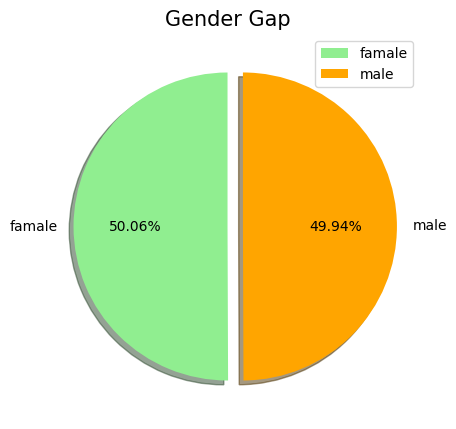

In [ ]:
# Show Gender Customer

labels= ['famale','male']
size=data['gender'].value_counts()
colors=['lightgreen','orange']
explode =[0, 0.1]

fig, axes= plt.subplots(figsize=(8,5))
plt.pie(size, colors= colors, explode=explode,
        labels=labels, shadow=True, startangle= 90,
        autopct='%.2f%%')

plt.title('Gender Gap', fontsize=15)
plt.legend()
plt.show()

Balance between male and female users

### Refferal Gap

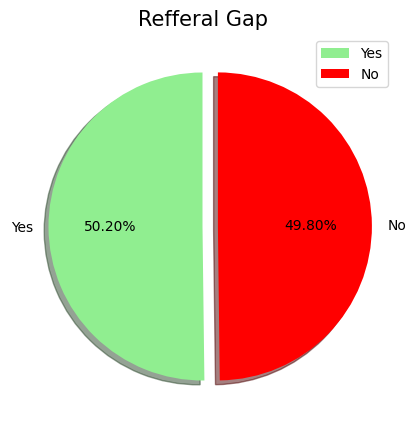

In [ ]:
# Show Refferal Customer

labels= ['Yes','No']
size=data['joined_through_referral'].value_counts()
colors=['lightgreen','red']
explode =[0, 0.1]

fig, axes= plt.subplots(figsize=(8,5))
plt.pie(size, colors= colors, explode=explode,
        labels=labels, shadow=True, startangle= 90,
        autopct='%.2f%%')

plt.title('Refferal Gap', fontsize=15)
plt.legend()
plt.show()

Balanced between Yes or No customer joined using refferal

### Age Category

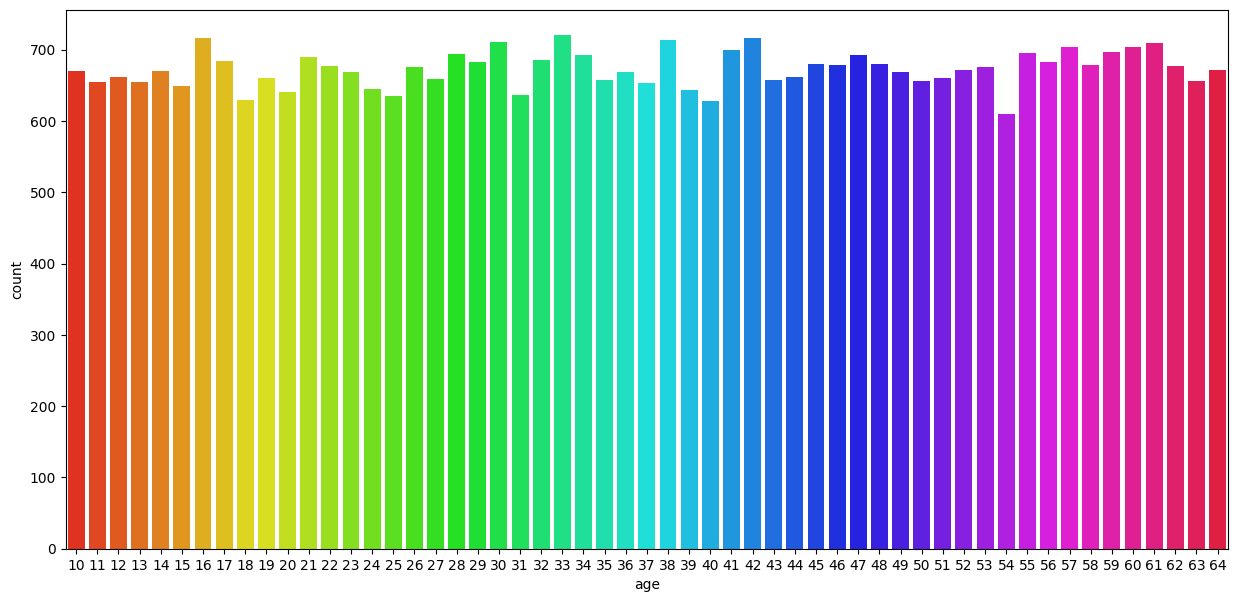

In [ ]:
# Show all user age in plot

plt.figure(figsize=(15, 7))
sns.countplot(x=data['age'], palette='hsv')
plt.show()

In [ ]:
# Make new dataset copy for processing age category

df = data.copy()

In [ ]:
# Make a new columns for age category

bins= [10,26,33, 46, 81]
df['Age Category']= pd.cut(df['age'], bins=bins, labels=['10-25','26-32','33-45','46-80'])
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Age Category
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,26-32
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1,46-80
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0,10-25
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1,46-80
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0,46-80


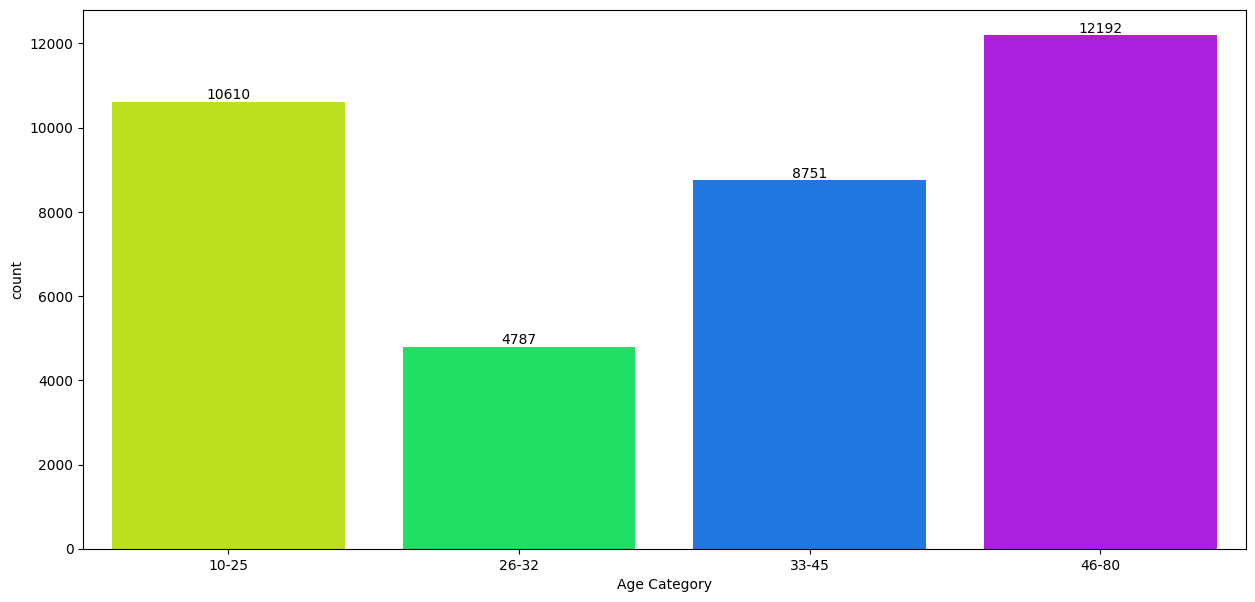

In [ ]:
# Show Age Category in Plot

plt.figure(figsize=(15, 7))
ax = sns.countplot(x=df['Age Category'], palette='hsv')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Dominated customer with range segmentation age 40-80

### Membership Customer

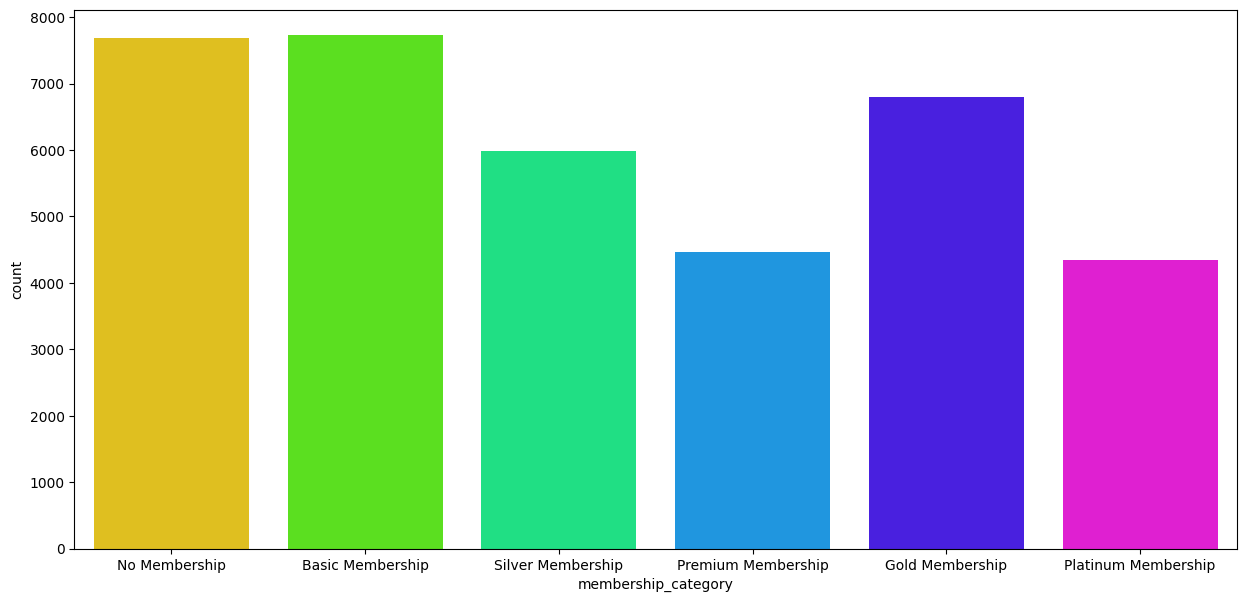

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(x=data['membership_category'], palette='hsv')
plt.show()

There are two types of membership (No Membership and Basic Membership) that dominate web services

In [ ]:
# groupby age category by membership category

member_age = df.groupby(['membership_category'])[['Age Category']].value_counts().reset_index(name='count')

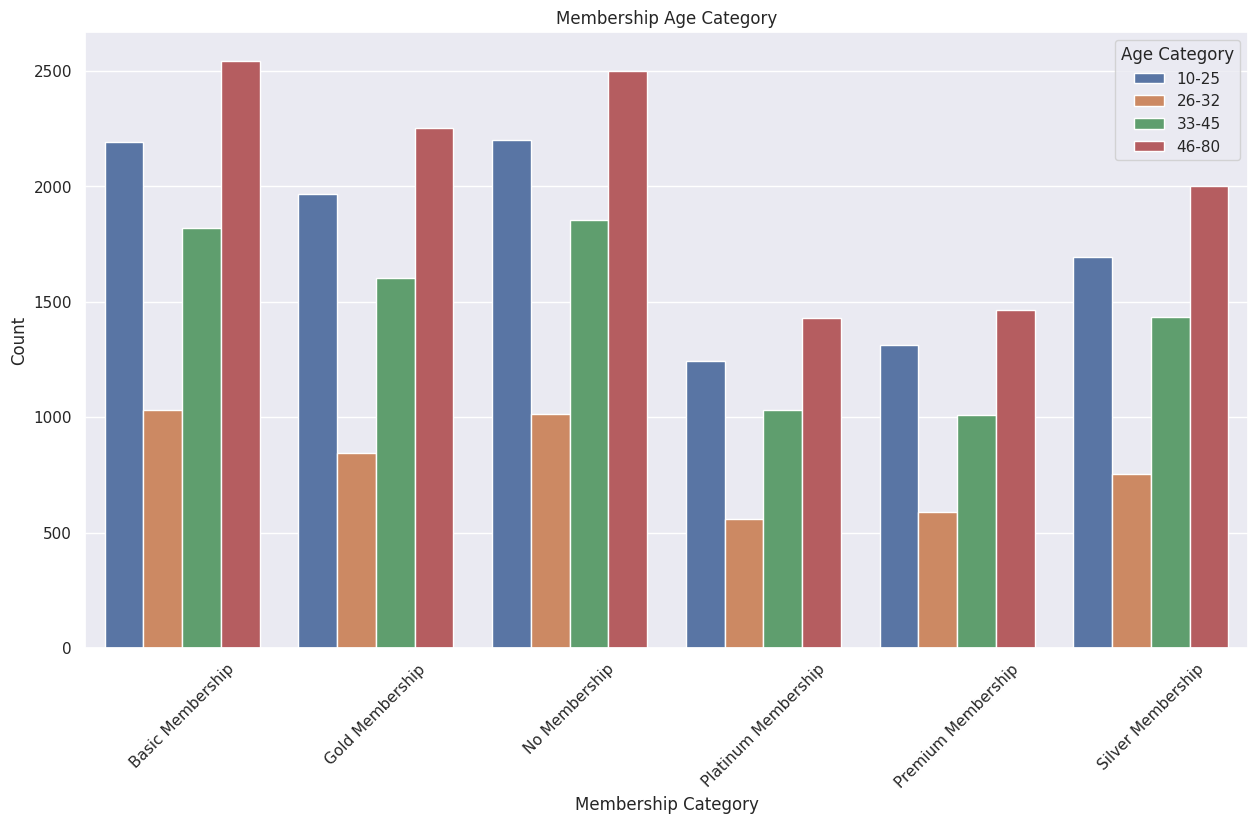

In [ ]:
# Show plot offer types customer by membership category

plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
sns.barplot(x='membership_category', y='count', hue='Age Category', data=member_age)
plt.title('Membership Age Category')
plt.xlabel('Membership Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Category')
plt.show()

No Memberbership and Basic Membership dominated with age category 46-80 years

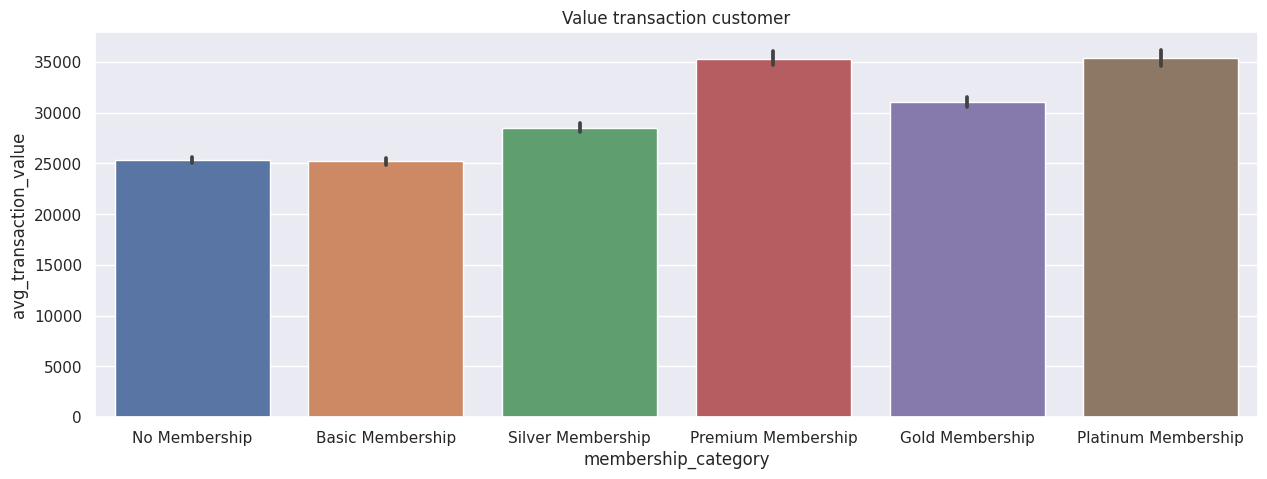

In [ ]:
# Show average transaction from membership category

plt.figure(figsize=(15, 5))
sns.barplot(data=data, x='membership_category', y='avg_transaction_value')
plt.title('Value transaction customer');

But the biggest transaction come from Platinum and Premium membership

In [ ]:
# Using groupby for count offer customer types

gf = data.groupby(['membership_category'])[['preferred_offer_types']].value_counts().reset_index(name='count')

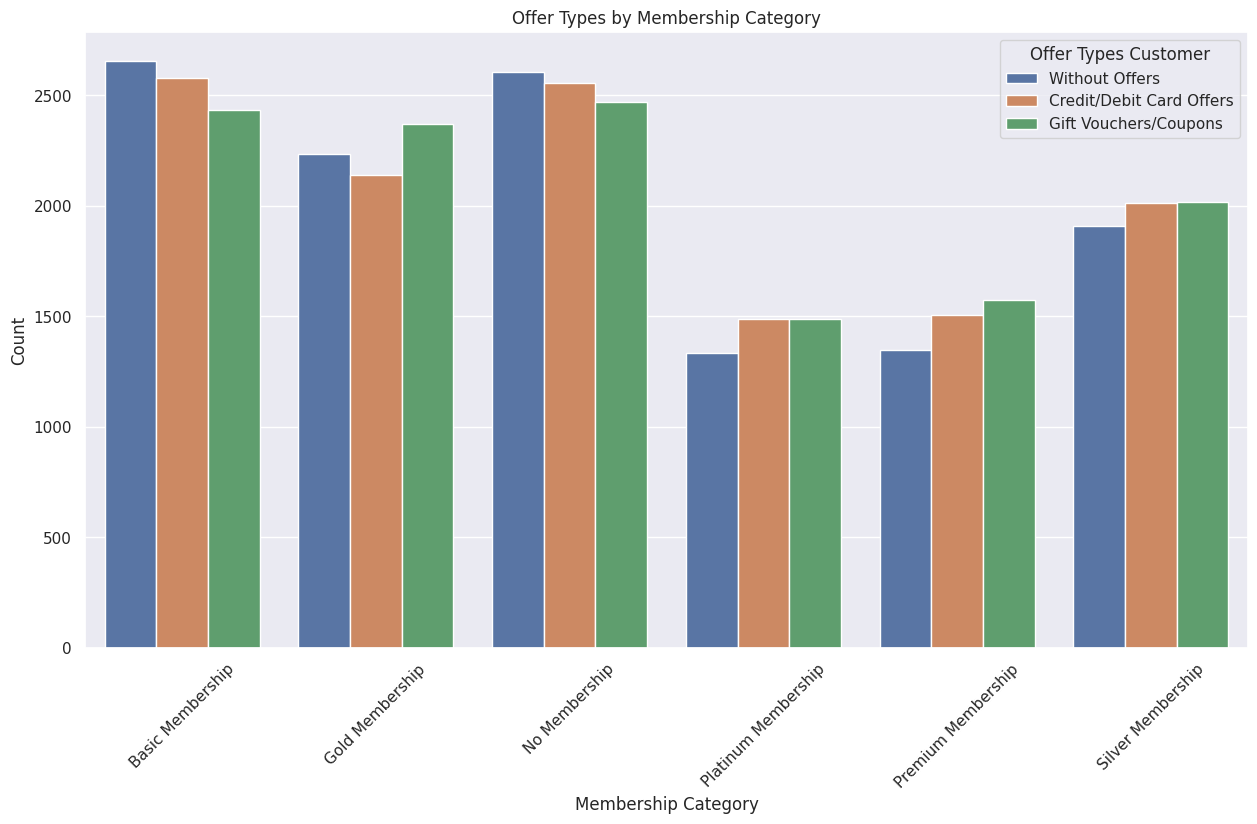

In [ ]:
# Show plot offer types customer by membership category

plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
sns.barplot(x='membership_category', y='count', hue='preferred_offer_types', data=gf)
plt.title('Offer Types by Membership Category')
plt.xlabel('Membership Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Offer Types Customer')
plt.show()

1. No membership dominated offer types 'Without Offers'
2. Basic membership dominated offer types 'Without Offers'
3. Silver membership dominated offer types 'Gift Vouchers/Coupons'
4. Gold membership dominated offer types 'Gift Vouchers/Coupons'
5. Platinum membership dominated offer types 'Credit/Debit Card Offers'
6. Premium membership dominated offer types 'Gift Vouchers/Coupons'

In [ ]:
# Using groupby for count churn customer

rg = data.groupby(['membership_category'])[['churn_risk_score']].value_counts().reset_index(name='count')

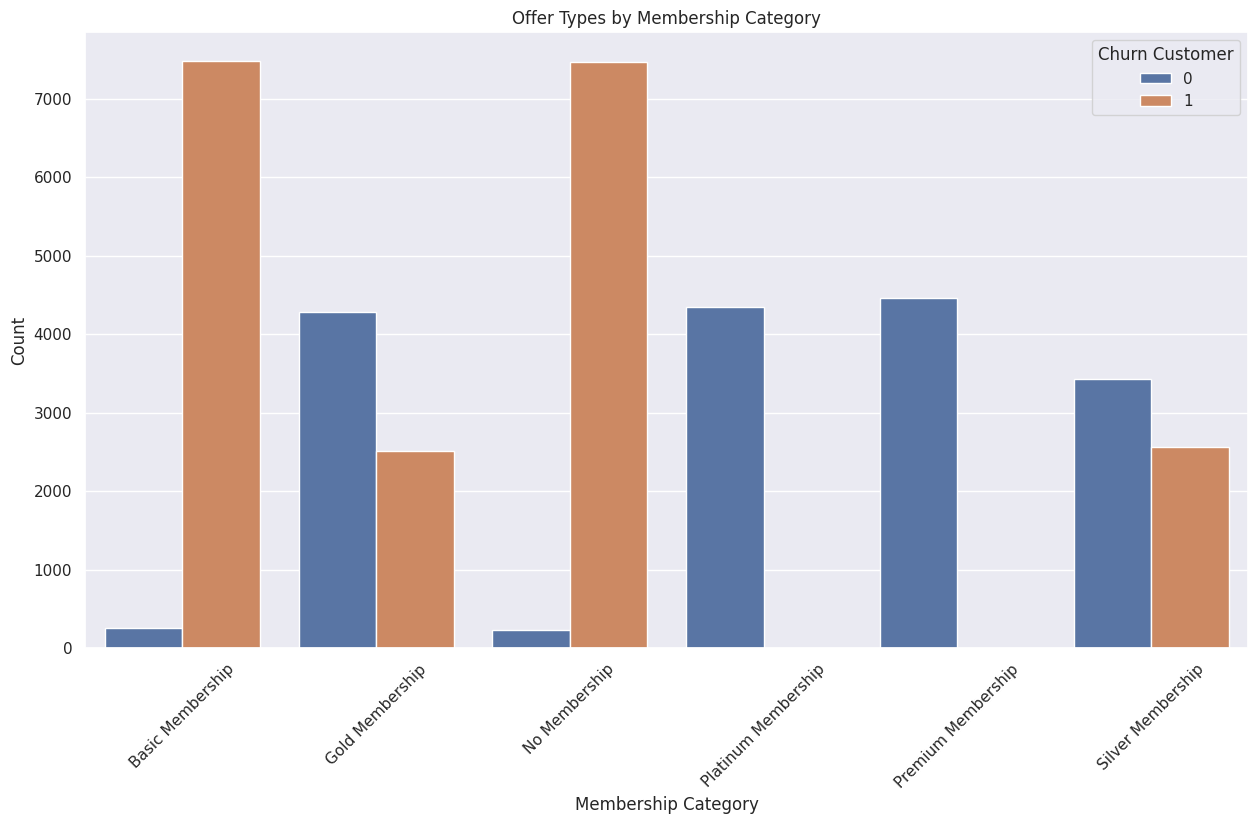

In [ ]:
# Show plot churn customer by membership category

plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
sns.barplot(x='membership_category', y='count', hue='churn_risk_score', data=rg)
plt.title('Offer Types by Membership Category')
plt.xlabel('Membership Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn Customer')
plt.show()

No Membership and Basic Membership are the customer segments with the highest churn not continuing product usage. However, the company has loyal customers in the Platinum and Premium membership segmentation.

### Medium Customer

In [ ]:
# Show all user medium operation in plot

plt.figure(figsize=(15, 7))
sns.countplot(x=data['medium_of_operation'], palette='hsv')
plt.show()

most customer use desktop and smartphone for acsess the product in website, maybe we can create aplication for smartphone users.

In [ ]:
# Show all internet option user in plot

plt.figure(figsize=(15, 7))
sns.countplot(x=data['internet_option'], palette='hsv')
plt.show()

The average customer uses more wifi and mobile data to access company products, this can be an opportunity for companies to develop applications and websites for the following reasons:
1. mobile data users are users who access products using smartphones
2. the use of both is a user who may access via a desktop or smartphone

### Feedback Customer

In [ ]:
# Using groupby for count complaint customer

grouped_data = data.groupby(['membership_category'])[['complaint_status']].value_counts().reset_index(name='count')

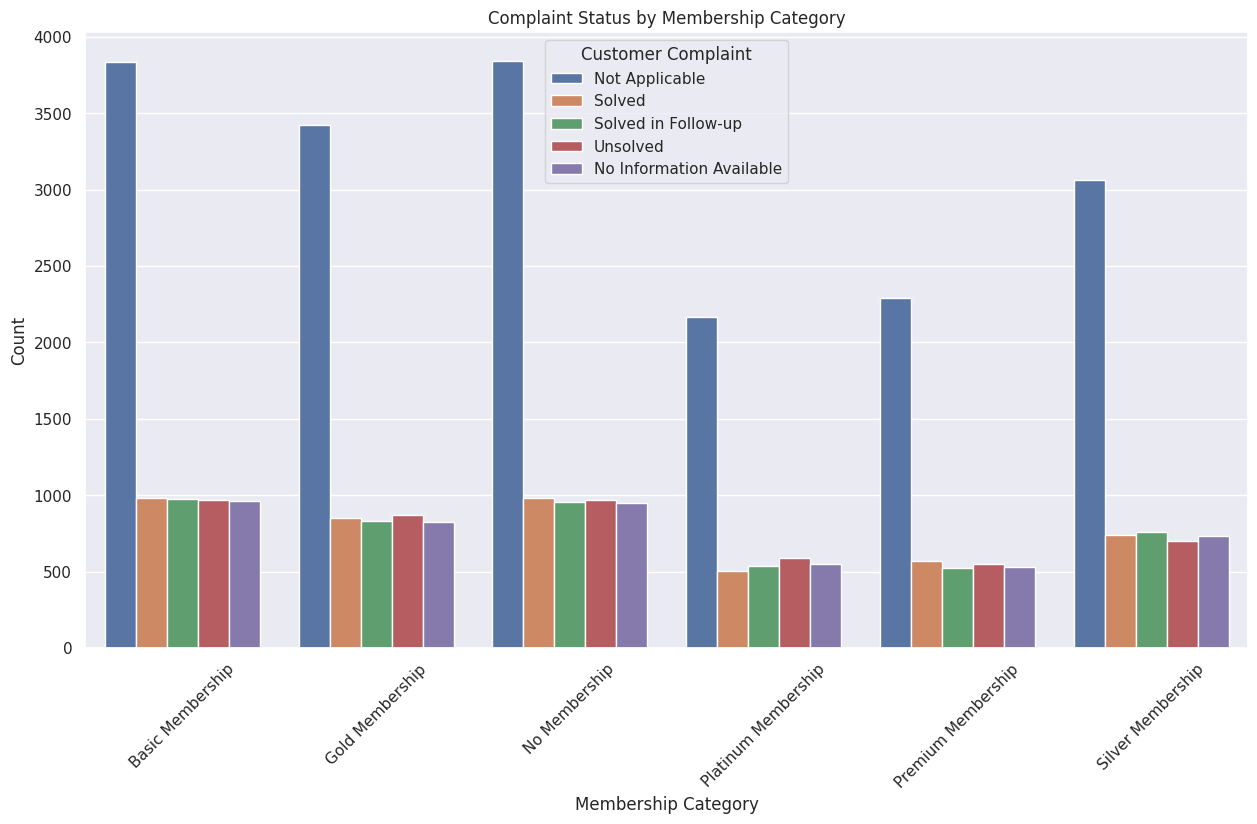

In [ ]:
# Show plot complaint customer by membership category

plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
sns.barplot(x='membership_category', y='count', hue='complaint_status', data=grouped_data)
plt.title('Complaint Status by Membership Category')
plt.xlabel('Membership Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Complaint')
plt.show()

Average customer from all member categories gave a Not Applicable response about their complaint, maybe we can training our customer services to provide the best services.

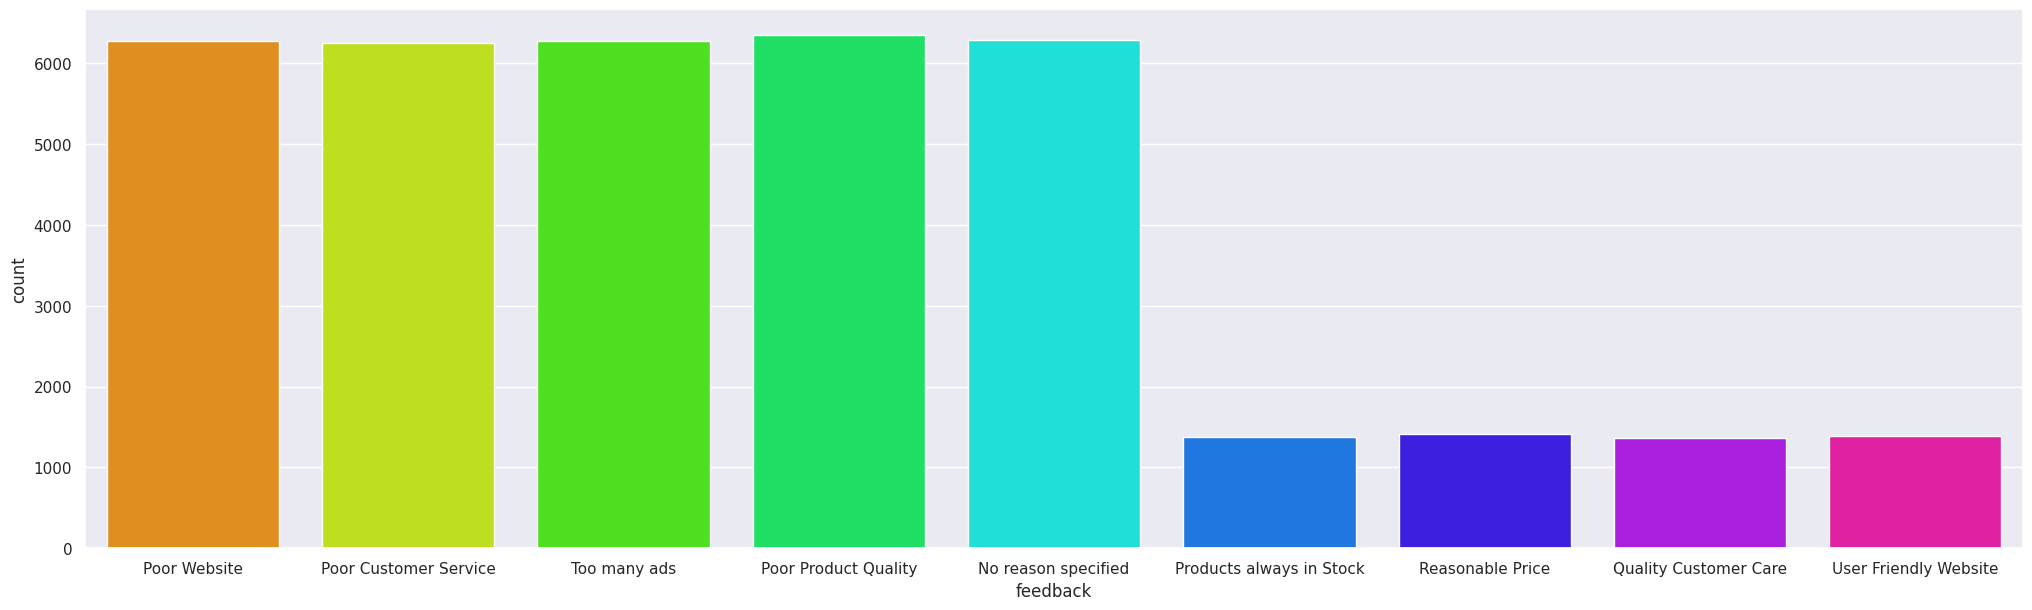

In [ ]:
# Knowing frequency of feed back customer by plot

plt.figure(figsize=(25, 7))
sns.countplot(x=data['feedback'], palette='hsv')
plt.show()

The average feedback provided by customers typically consists of complaints regarding website functionality and customer service quality in handling customer complaint.
1. for out website we can fix specific problem not to much ads and fix about user interface and user experience
2. Training customer service about our prodects and make sure they give best handling customer complaint
3. create inovation for product qulity by customer needs

In [ ]:
# Using groupby for count feedback customer

cf = data.groupby(['membership_category'])[['feedback']].value_counts().reset_index(name='count')

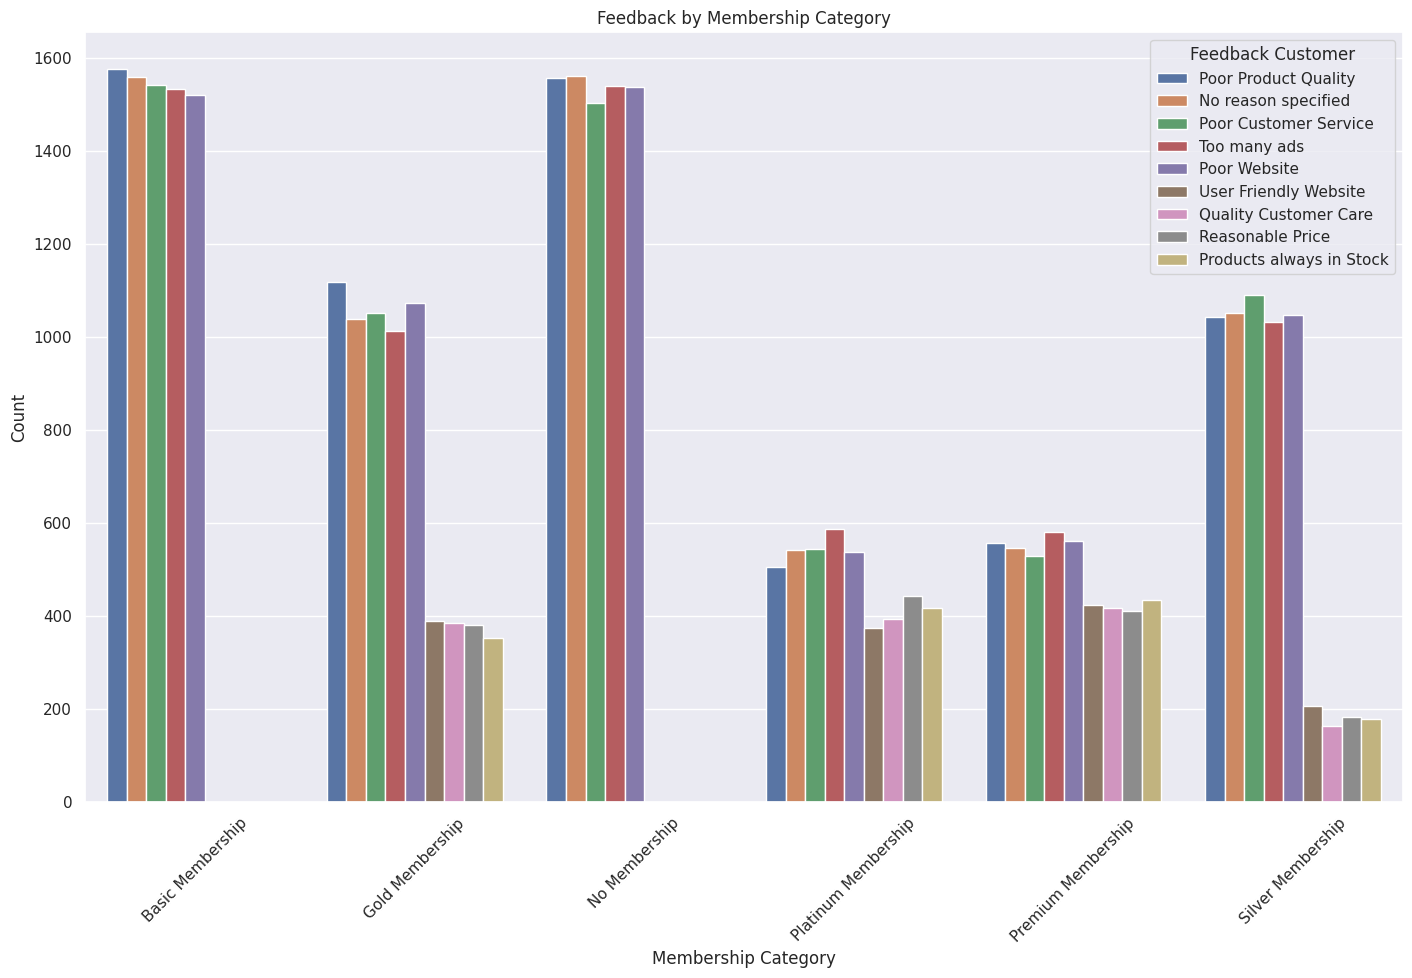

In [ ]:
# Show plot complaint customer by membership category

plt.figure(figsize=(17, 10))
sns.set(style="darkgrid")
sns.barplot(x='membership_category', y='count', hue='feedback', data=cf)
plt.title('Feedback by Membership Category')
plt.xlabel('Membership Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Feedback Customer')
plt.show()

1. No Membership dominated feedback No Reason Spacified
2. Basic membership dominated feedback Poor Product Quality
3. Silver membership dominated feedback Poor Customer Service
4. Gold membership dominated feedback Poor Product Quality
5. Platinum membership dominated feedback Too many ads
6. Premium membership dominated feedback Too many ads

### Correlation

In [ ]:
# groupby numeric data

hf = data[['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']]

In [ ]:
# Lets check correlation by colour variation

corr = hf.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

The overall data does not have a significant correlation between each other

## 4.2 Missing value analysis

In [ ]:
# check missing value by isna method

data.isna().sum()

There's missing value in gender, region_category, joined_through_referral, preferred_offer_types, medium_of_operation columns

## 4.3 Outlier Analysis

In [ ]:
# check outlier by skew method

data.skew()

# 5. Feature Enginering

in this celss containing data processing (Split data, Selection, Get Numerical and Categorical) for modelling

## 5.1 Split Between Train-Set, Val_Set, dan Test-set

In [ ]:
# define variable x and y for train-test split

X = data_copy.drop('churn_risk_score', axis=1)
y = data_copy['churn_risk_score']

In [ ]:
# Get data test, data train, and data validation with train-test split method

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=20)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

## 5.2 Feature Selection

In [ ]:
X_train

We considering that user_id, last_visit_time, and joining_date have no correlation for churn target

In [ ]:
# Drop columns

X_train.drop(['user_id', 'last_visit_time', 'joining_date'],  axis=1, inplace=True)
X_val.drop(['user_id', 'last_visit_time', 'joining_date'],  axis=1, inplace=True)
X_test.drop(['user_id', 'last_visit_time', 'joining_date'],  axis=1, inplace=True)

## 5.3 Get Numerical and Categorical

In [ ]:
# Define Numerical Columns
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Define Categorical Columns
# Because we want to use two method of encoding, we define two catgorical columns
cat_cols1 = ['membership_category']
cat_cols2 = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


print('Numerical Columns : ', num_cols)
print('Categorical Columns : ', cat_cols1)
print('Categorical Columns : ', cat_cols2)

# 6. Pipeline

In this cells contain pipline method for handling outlier (winsorizer IQR), missing value (Simple Imputer by median and most frequent), Scalling (MinMaxScaller) ,encoding (Ordinal and OneHotEncoding), and input data pipleline

In [ ]:
# Numeric columns pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
    ('scaler', MinMaxScaler())
])

# Categorical ordinal columns pipeline
cat_ord_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(categories=[["No Membership", "Basic Membership", "Silver Membership",
                                            "Gold Membership","Premium Membership","Platinum Membership"]]))
])

# Categorical nominal columns pipeline
cat_nom_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

# Column Transformer
final_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat_ord', cat_ord_pipeline, cat_cols1),
        ('cat_nom', cat_nom_pipeline, cat_cols2)
])

In [ ]:
# application pipeline data processing

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.fit_transform(X_val)
X_test = final_pipeline.fit_transform(X_test)

In [ ]:
# Input Data Pipeline

train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(32)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(32)

# 7. Sequential API

In this cells context we use ANN model built using the Sequential API for customer churn prediction, this modelling can analyze patterns and relationships within a dataset to predict whether a customer is likely to churn or not. By training the model on historical customer data that includes various features such as customer segmentation, medium customer, transaction, and customer service interactions, the model learns to identify patterns that are indicative of churn.

## Model Definition

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Define Sequential Model
model_sequential = Sequential()
model_sequential.add(Dense(32,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(49,))) # Hidden Layer
model_sequential.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 3
model_sequential.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) #Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_sequential.summary()

In [ ]:
# Plot Layer

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## Model Training

We used Early stopping as technique during the training of machine learning models, including neural networks (sequential and functional), to prevent overfitting and improve generalization performance. The main purpose of early stopping is to find an optimal point in training where the model performs well on both the training data and unseen validation data, without continuing to train until it starts overfitting.

In [ ]:
# Define erlystopping

early_stopping = EarlyStopping(
    monitor='loss',
    patience=10,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
)

In [ ]:
# Training Model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=200,
                                   validation_data=(val_pipe),
                                   batch_size=30,
                                   callbacks=[early_stopping])

## Model Evaluation

In [ ]:
# Make result of training model to data frame

history_seq_df = pd.DataFrame(history_seq.history)

In [ ]:
# Show in Plot grafik about the result

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

From this plot we can get insight that data good vit until Epoch 20, after that the value val loos move to higher value away from loss charts make the data Over Vit

In [ ]:
## Model Evaluation of test_set

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

1. The model achieves an accuracy of 92%. This means that it correctly predicts the churn or non-churn status of customers 92% of the time. Accuracy provides an overall measure of how well the model performs.
2. The precision measures the proportion of correctly predicted churn or non-churn customers out of all the predicted churn or non-churn customers. In this case, the precision for predicting churn (label 1) is 0.92, indicating that when the model predicts a customer will churn, it is correct 92% of the time. For predicting non-churn (label 0), the precision is also 0.92, suggesting that when the model predicts a customer will not churn, it is correct 92% of the time.
3. Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted churn or non-churn customers out of all the actual churn or non-churn customers. The recall for predicting churn (label 1) is 0.93, indicating that the model identifies 93% of the actual churn customers. For predicting non-churn (label 0), the recall is 0.90, meaning the model correctly identifies 90% of the actual non-churn customers.
4. The F1-score for predicting churn (label 1) is 0.92, while for predicting non-churn (label 0) it is also 0.92. A high F1-score indicates a good balance between precision and recall.
5. The support represents the number of samples in each class. In this case, there are 2,524 samples for the non-churn class (label 0) and 3,028 samples for the churn class (label 1).

Conclussion : The model shows good performance with high accuracy, precision, recall, and F1-score for both churn and non-churn predictions. It suggests that the Sequential API model is effective in identifying churn customers and non-churn customers, providing valuable insights for customer retention strategies and business decision-making. But Data is Undervit, so wee need improvement for ths modelling.

The increase in the validation loss indicates that the model's performance is deteriorating on unseen data, which can be problematic when deploying the model for real-world predictions. It suggests that the model is becoming too complex and is overfitting to the training data

# 8. Functional API

The Functional API allows for models with multiple inputs and outputs, which can be beneficial when incorporating diverse sets of data or considering different aspects related to customer churn. For example, you can include customer customer segmen information, transaction history, and customer service interactions as separate input streams, enabling the model to learn more informative representations and patterns.

## Model Definition

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# create fucntional model

input_layer = Input(shape=(49,))
hidden_layer_1 = Dense(16,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(8,
                       activation='relu',
                       kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')

model_functional.summary()

In [ ]:
# Plot Layer

tf.keras.utils.plot_model(model_functional, show_shapes=True)

## Model Training

In [ ]:
# Training Model

%%time
history_func = model_functional.fit(train_pipe,
                                   epochs=200,
                                   validation_data=(val_pipe),
                                   batch_size=20,
                                   callbacks=[early_stopping])

## Model Evaluation

In [ ]:
# Make DataFrame from result training

history_func_df = pd.DataFrame(history_func.history)

In [ ]:
# Show in Plot of the result

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

From this plot we can get insight that data close to good vit before Epoch 40, after that the value val loos move to higher value away from loss charts make the data Over Vit

In [ ]:
# Evaluasi test_set

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

1. The model achieves an accuracy of 92%, indicating that it correctly predicts the churn or non-churn status of customers 92% of the time. Accuracy provides an overall measure of the model's performance.
2. The precision for predicting churn (label 1) is 0.93, indicating that when the model predicts a customer will churn, it is correct 93% of the time. For predicting non-churn (label 0), the precision is 0.90, suggesting that when the model predicts a customer will not churn, it is correct 90% of the time.
3. Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted churn or non-churn customers out of all the actual churn or non-churn customers. The recall for predicting churn (label 1) is 0.91, indicating that the model identifies 91% of the actual churn customers. For predicting non-churn (label 0), the recall is 0.92, meaning the model correctly identifies 92% of the actual non-churn customers.
4. The F1-score for predicting churn (label 1) is 0.92, while for predicting non-churn (label 0) it is also 0.91. A high F1-score indicates a good balance between precision and recall.
5. The support represents the number of samples in each class. In this case, there are 2,524 samples for the non-churn class (label 0) and 3,028 samples for the churn class (label 1).

Conclusion : The model shows good performance with high accuracy, precision, recall, and F1-score for both churn and non-churn predictions. It suggests that the Functional API model is effective in identifying churn customers and non-churn customers, providing valuable insights for customer retention strategies and business decision-making. The model demonstrates a balanced trade-off between precision and recall, ensuring accurate predictions while minimizing false positives and false negatives. But because the result of the training shoh us that's Over vit data. The increase in the validation loss indicates that the model's performance is deteriorating on unseen data, which can be problematic when deploying the model for real-world predictions. It suggests that the model is becoming too complex and is overfitting to the training data

# 9. Model Improvement

Because the data Overvitting we Adding batch normalization and st optimazer to 'nadam' for effective technique. Batch normalization normalizes the inputs of each layer by subtracting the batch mean and dividing by the batch standard deviation. It helps in reducing the internal covariate shift, which can improve the overall stability and generalization of the model.

## Batch Normalization

In [ ]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
model_sequential1 = Sequential()
model_sequential1.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(49,)))
model_sequential1.add(BatchNormalization())

model_sequential1.add(Dense(14,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential1.add(BatchNormalization())

model_sequential1.add(Dense(10,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 3
model_sequential1.add(BatchNormalization())

model_sequential1.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 4
model_sequential1.add(BatchNormalization())

model_sequential1.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer
model_sequential1.add(BatchNormalization())

# Compile
model_sequential1.compile(loss='binary_crossentropy',
                         optimizer='nadam',
                         metrics=['accuracy'])

model_sequential1.summary()

By incorporating batch normalization, we can mitigate the effects of overfitting by reducing internal covariate shift and improving the model's ability to generalize. This can help prevent the model from memorizing the training data too closely and enable it to better generalize to new, unseen data.

Using Nadam as the optimizer can further enhance the training process by adjusting the learning rate adaptively and leveraging Nesterov momentum to improve convergence speed and performance.

In [ ]:
# Plot Layer

tf.keras.utils.plot_model(model_sequential1, show_shapes=True)

## Model Training

In [ ]:
# Training Model

%%time
history_improv = model_sequential1.fit(train_pipe,
                                   epochs=200,
                                   validation_data=(val_pipe),
                                   batch_size=32,
                                   callbacks=[early_stopping])

In [ ]:
# Membuat DataFrame

history_improv_df = pd.DataFrame(history_improv.history)

# Plot

history_improv_df[['accuracy', 'val_accuracy']].plot()
history_improv_df[['loss', 'val_loss']].plot()

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(71),history_improv.history['loss'],label='train loss')
ax.plot(range(71),history_improv.history['val_loss'],label='val loss')
#plt.gca().set_ylim(220000, 223000)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [ ]:
# Evaluasi test_set

y_pred_func = model_sequential1.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

1. The model achieves an accuracy of 90%, indicating that it correctly predicts the churn or non-churn status of customers with an overall accuracy of 90% on the test set.
2. The precision for predicting churn (label 1) is 0.92, meaning that when the model predicts a customer will churn, it is correct 92% of the time. For predicting non-churn (label 0), the precision is 0.87, suggesting that when the model predicts a customer will not churn, it is correct 87% of the time.
3. Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted churn or non-churn customers out of all the actual churn or non-churn customers. The recall for predicting churn (label 1) is 0.89, indicating that the model identifies 89% of the actual churn customers. For predicting non-churn (label 0), the recall is 0.91, meaning the model correctly identifies 91% of the actual non-churn customers.
4. The F1-score for predicting churn (label 1) is 0.91, while for predicting non-churn (label 0) it is 0.89. A high F1-score indicates a good balance between precision and recall.
5. The support represents the number of samples in each class. In this case, there are 2,524 samples for the non-churn class (label 0) and 3,028 samples for the churn class (label 1).

# 10. Model Saving

In [ ]:
# Saving pipeline

with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [ ]:
# freeze model

model_sequential1.trainable = True
model_sequential1.summary()

In [ ]:
# Save ANN Model

model_sequential1.save('churn_model.h5')

# 11. Model Inference

Lets chechk it [model inference](https://https://colab.research.google.com/drive/1lXAa_4mnFIT2tM3iG6cEuVWdpuGxKgGJ?usp=sharing)

# 12. Conclusion

1. Customer segmentation is dominated by two age ranges: young adults (10-25 years old) and older adults (46-80 years old). These age ranges are concentrated in the No Membership and Basic Membership categories. However, these categories contribute only a small portion of revenue to the company due to their low average transaction amounts. The company needs to increase the number of customers transitioning from No Membership to Basic Membership and from Basic Membership to higher tiers.

2. One recommendation is for the company to improve its service quality. Training the Customer Service team to handle customer complaints effectively is essential. Additionally, the company should focus on improving its website and product quality through innovation. These efforts will help the company cultivate loyal customers who will remain with the company, thereby generating more revenue.

3. Overall, the model improve with the added batch normalization performs well with high accuracy, precision, recall, and F1-score for both churn and non-churn predictions. It indicates that incorporating batch normalization has helped reduce overfitting and improve the model's generalization to unseen data. The model demonstrates a good balance between precision and recall, ensuring accurate predictions while minimizing false positives and false negatives.